In [362]:
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from main.utils.data_manage_utils import load_processed_data_by_folder, print_shapes, encode_cyclical, decode_cyclical

# Variables
ROOT_PATH = os.path.abspath("../../../")
DATA_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/base/reg")

X_train, y_train, X_test, y_test = load_processed_data_by_folder(DATA_FOLDER)
print_shapes(X_train, y_train, X_test, y_test)

train = X_train.copy()
train[y_train.name] = y_train
train

Shape of X_train: (263204, 45)
Shape of y_train: (263204,)
Shape of X_test: (65801, 45)
Shape of y_test: (65801,)


,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),TAIL_HEIGHT(M),PARKING_AREA(SQM),MTOW(KG),JET(YN),WINGLETS(YN),TEMP(C),DEWPOINT_TEMP(C),FELT_TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),1HOUR_PRECIPITATION(INCH),ALTIMETER(PA),SEA_LEVEL_PRESSURE(MILLIBAR),VISIBILITY(MILES),EVENT_BR,EVENT_DZ,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5998106,-11.0,-11.0,107,89,548.78494,74,-0.433884,-0.900969,-0.985556,0.169350,2,255.576,32.799528,46.500014,9.000744,1525.176514,72574.7200,1,1,6.722222,-3.277778,2.644444,48.88,290.0,26.854,0.00,101862.579714,1018.8,10.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,3.0,0.0,3.0,109
9744846,-11.0,-11.0,-3,106,830.41944,83,0.433884,-0.900969,0.496217,-0.868199,2,255.576,32.799528,46.500014,9.000744,1525.176514,72574.7200,1,1,22.222222,19.388889,22.222222,83.99,330.0,9.260,0.00,101727.124156,1016.2,10.0,0,0,0,2,0,0,0,0,0,0,0,3.0,3.0,0.0,3.0,3.0,-5
8656393,-11.0,-9.0,64,98,653.39204,53,-0.781831,0.623490,-0.548293,-0.836286,2,255.576,32.799528,46.500014,9.000744,1525.176514,72574.7200,1,1,22.777778,21.722222,23.561111,93.77,270.0,12.964,0.06,101828.715825,1017.5,10.0,2,0,0,0,0,0,0,0,3,0,2,0.0,3.0,0.0,0.0,3.0,46
7404998,-11.0,-8.0,-2,121,935.02654,88,-0.433884,-0.900969,-0.719340,0.694658,2,261.132,34.314384,42.114216,12.624816,1445.094760,79015.7264,1,0,27.777778,18.277778,28.755556,56.24,180.0,18.520,0.00,101727.124156,1016.3,10.0,0,0,0,0,0,0,0,0,0,0,0,0.0,3.0,3.0,3.0,3.0,-19
8855927,-11.0,-5.0,15,132,1120.10064,74,0.433884,-0.900969,-0.845728,0.533615,2,257.428,28.446984,37.795200,9.043416,1075.157934,53523.8560,1,0,31.722222,21.722222,35.194444,55.46,220.0,9.260,0.00,101794.851935,1016.2,10.0,0,0,0,0,0,0,0,0,0,2,0,3.0,0.0,3.0,0.0,3.0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6.0,-9.0,-3,126,975.26004,95,-0.781831,0.623490,0.678801,-0.734323,2,229.648,26.008584,31.674816,9.854184,823.857302,40369.6880,1,1,3.888889,-5.000000,0.727778,52.30,240.0,16.668,0.00,101456.213040,1014.9,10.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0,-15
7551519,-11.0,-15.0,-8,142,1200.56764,74,0.000000,1.000000,-0.649448,-0.760406,2,257.428,28.446984,37.795200,9.043416,1075.157934,53523.8560,1,0,15.000000,7.222222,15.000000,59.67,310.0,9.260,0.00,101964.171383,1019.3,10.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,-33
7375452,-11.0,-8.0,-4,122,935.02654,58,0.433884,-0.900969,-0.999914,-0.013090,2,264.836,38.048184,54.431184,13.639800,2071.070234,122469.8400,1,0,21.722222,19.694444,22.011111,87.51,200.0,14.816,0.00,101015.982476,1009.0,9.5,0,0,0,0,0,0,0,2,2,2,2,0.0,0.0,3.0,0.0,0.0,-1
7757994,-6.0,-8.0,180,92,584.19042,62,-0.781831,0.623490,-0.608761,0.793353,2,259.280,20.930616,26.770584,6.324600,560.293571,21522.9404,1,1,28.277778,19.388889,29.694444,58.55,260.0,12.964,0.00,101828.715825,1017.2,10.0,0,0,0,0,0,0,0,0,0,0,0,1.0,3.0,1.0,3.0,1.0,158


In [363]:
int_cols = ["MEDIAN_CARR_DELAY(MINS)","MEDIAN_ORIGIN_DELAY(MINS)","08L/26R","08R/26L","09L/27R", "09R/27L", "10/28", "VISIBILITY(MILES)"]
for col in train.columns:
    if col in int_cols:
        train[col] = train[col].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263204 entries, 5998106 to 7249134
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MEDIAN_CARR_DELAY(MINS)       263204 non-null  int32  
 1   MEDIAN_ORIGIN_DELAY(MINS)     263204 non-null  int32  
 2   DEP_DELAY(MINS)               263204 non-null  int32  
 3   CRS_ELAPSED_TIME(MINS)        263204 non-null  int32  
 4   DISTANCE(KM)                  263204 non-null  float64
 5   NR_PREV_ARR_FLIGHTS(1HR)      263204 non-null  int64  
 6   ARR_DAY_SIN                   263204 non-null  float64
 7   ARR_DAY_COS                   263204 non-null  float64
 8   ARR_MIN_OF_DAY_SIN            263204 non-null  float64
 9   ARR_MIN_OF_DAY_COS            263204 non-null  float64
 10  NR_ENGINES                    263204 non-null  int32  
 11  APPROACH_SPEED(KMH)           263204 non-null  float64
 12  WINGSPAN(M)                   263204 

In [364]:
decoded = decode_cyclical(train, "ARR_DAY_SIN", "ARR_DAY_COS", 7)
encoded = encode_cyclical(decoded,"ARR_DAY",7)
decoded[train["ARR_DAY_COS"] - encoded["ARR_DAY_COS"] != 0]["ARR_DAY"]

Series([], Name: ARR_DAY, dtype: int32)

In [365]:
train = decode_cyclical(train, "ARR_DAY_SIN", "ARR_DAY_COS", 7)
train = decode_cyclical(train, "ARR_MIN_OF_DAY_SIN", "ARR_MIN_OF_DAY_COS", 24*60)
train

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY,ARR_MIN_OF_DAY,NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),TAIL_HEIGHT(M),PARKING_AREA(SQM),MTOW(KG),JET(YN),WINGLETS(YN),TEMP(C),DEWPOINT_TEMP(C),FELT_TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),1HOUR_PRECIPITATION(INCH),ALTIMETER(PA),SEA_LEVEL_PRESSURE(MILLIBAR),VISIBILITY(MILES),EVENT_BR,EVENT_DZ,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5998106,-11,-11,107,89,548.78494,74,4,1119,2,255.576,32.799528,46.500014,9.000744,1525.176514,72574.7200,1,1,6.722222,-3.277778,2.644444,48.88,290.0,26.854,0.00,101862.579714,1018.8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,109
9744846,-11,-11,-3,106,830.41944,83,3,601,2,255.576,32.799528,46.500014,9.000744,1525.176514,72574.7200,1,1,22.222222,19.388889,22.222222,83.99,330.0,9.260,0.00,101727.124156,1016.2,10,0,0,0,2,0,0,0,0,0,0,0,3,3,0,3,3,-5
8656393,-11,-9,64,98,653.39204,53,6,853,2,255.576,32.799528,46.500014,9.000744,1525.176514,72574.7200,1,1,22.777778,21.722222,23.561111,93.77,270.0,12.964,0.06,101828.715825,1017.5,10,2,0,0,0,0,0,0,0,3,0,2,0,3,0,0,3,46
7404998,-11,-8,-2,121,935.02654,88,4,1256,2,261.132,34.314384,42.114216,12.624816,1445.094760,79015.7264,1,0,27.777778,18.277778,28.755556,56.24,180.0,18.520,0.00,101727.124156,1016.3,10,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,-19
8855927,-11,-5,15,132,1120.10064,74,3,1209,2,257.428,28.446984,37.795200,9.043416,1075.157934,53523.8560,1,0,31.722222,21.722222,35.194444,55.46,220.0,9.260,0.00,101794.851935,1016.2,10,0,0,0,0,0,0,0,0,0,2,0,3,0,3,0,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6,-9,-3,126,975.26004,95,6,549,2,229.648,26.008584,31.674816,9.854184,823.857302,40369.6880,1,1,3.888889,-5.000000,0.727778,52.30,240.0,16.668,0.00,101456.213040,1014.9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,-15
7551519,-11,-15,-8,142,1200.56764,74,0,882,2,257.428,28.446984,37.795200,9.043416,1075.157934,53523.8560,1,0,15.000000,7.222222,15.000000,59.67,310.0,9.260,0.00,101964.171383,1019.3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,-33
7375452,-11,-8,-4,122,935.02654,58,3,1077,2,264.836,38.048184,54.431184,13.639800,2071.070234,122469.8400,1,0,21.722222,19.694444,22.011111,87.51,200.0,14.816,0.00,101015.982476,1009.0,9,0,0,0,0,0,0,0,2,2,2,2,0,0,3,0,0,-1
7757994,-6,-8,180,92,584.19042,62,6,1290,2,259.280,20.930616,26.770584,6.324600,560.293571,21522.9404,1,1,28.277778,19.388889,29.694444,58.55,260.0,12.964,0.00,101828.715825,1017.2,10,0,0,0,0,0,0,0,0,0,0,0,1,3,1,3,1,158


## Plotting Boxplots and Histograms of All Columns

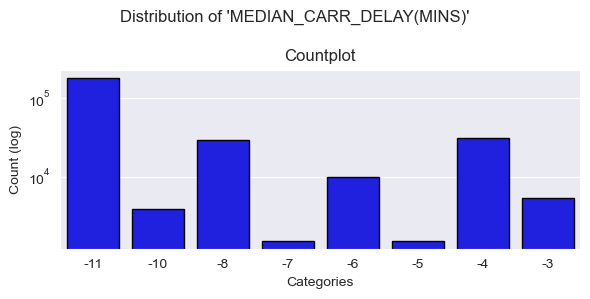

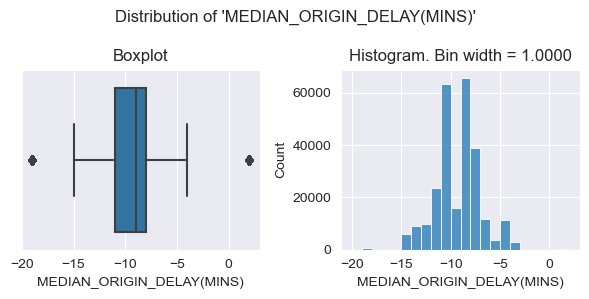

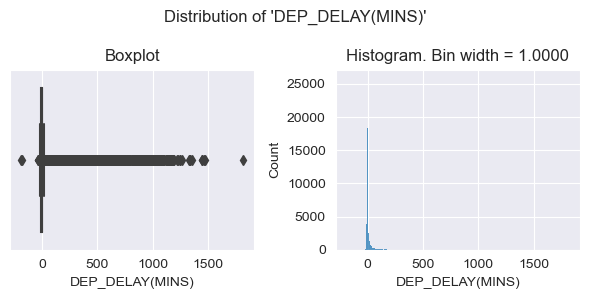

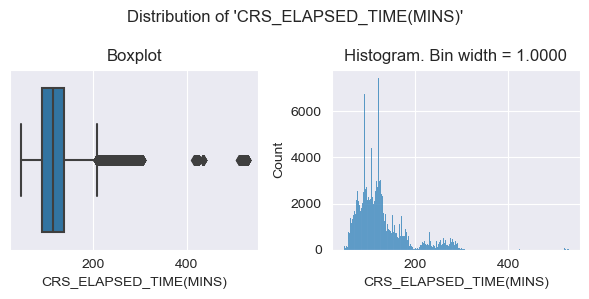

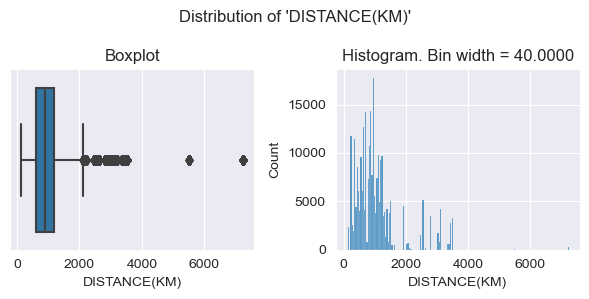

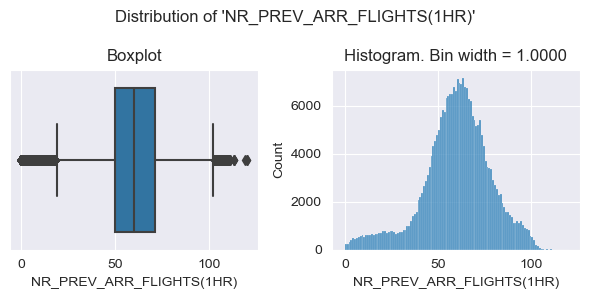

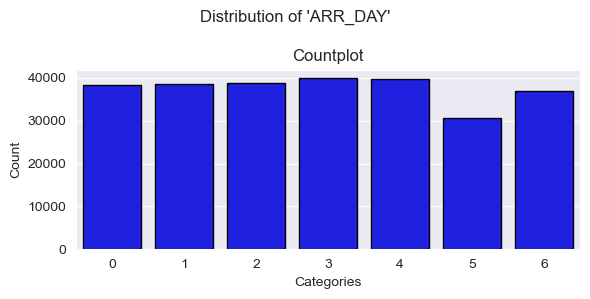

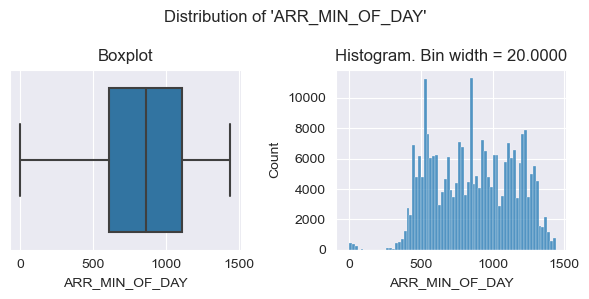

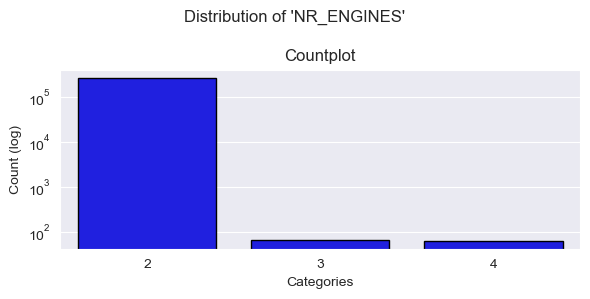

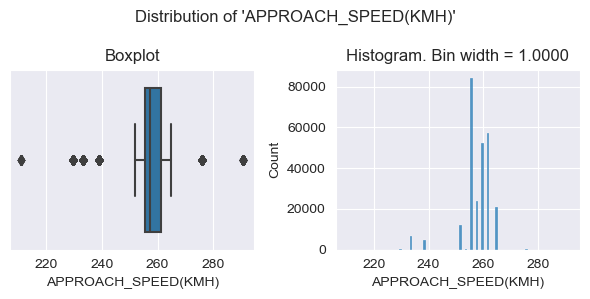

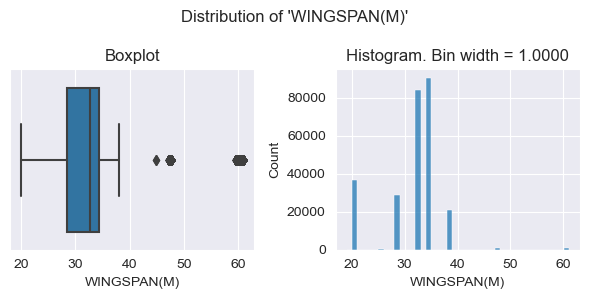

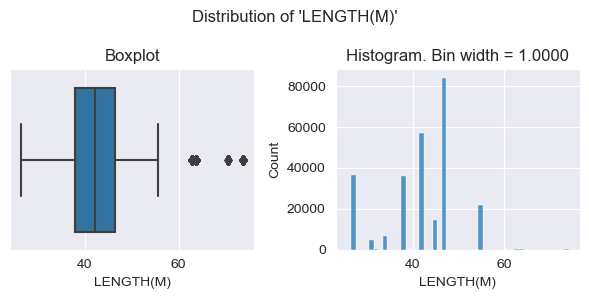

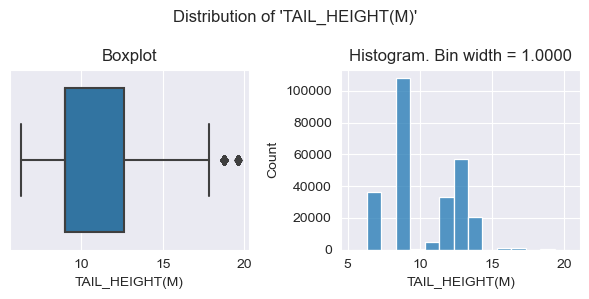

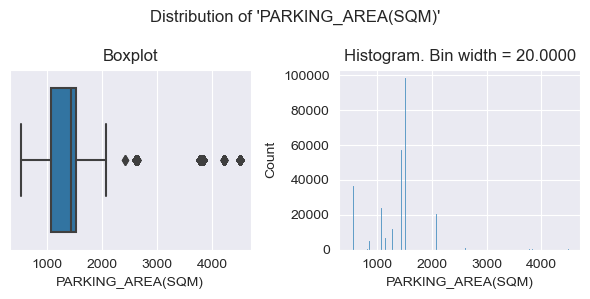

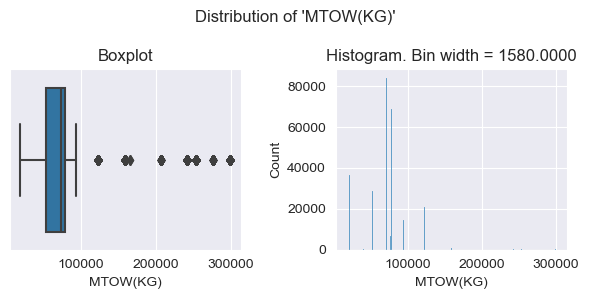

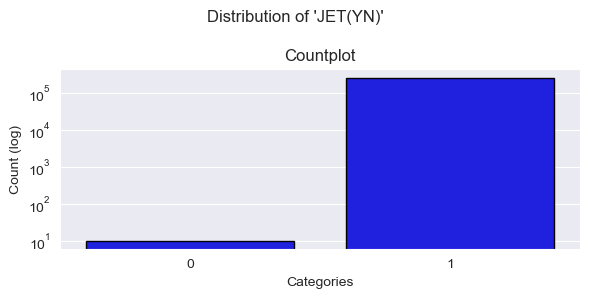

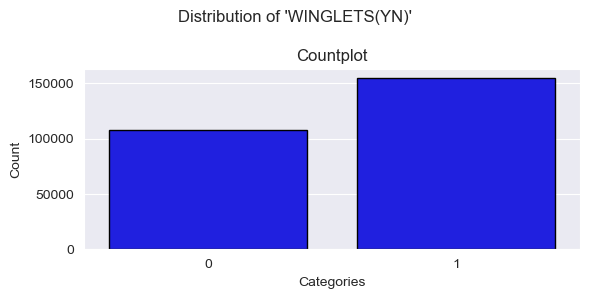

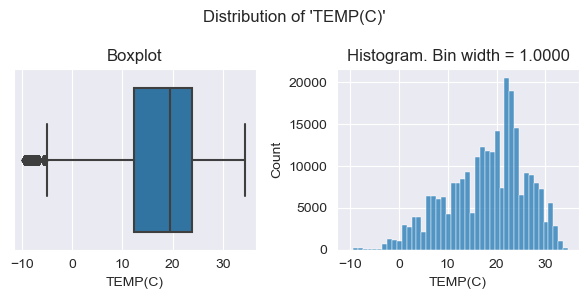

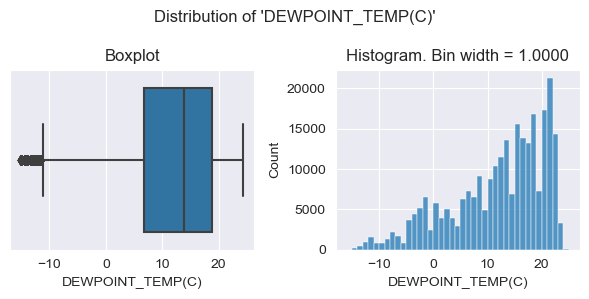

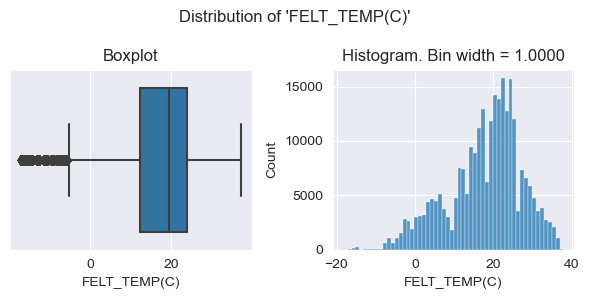

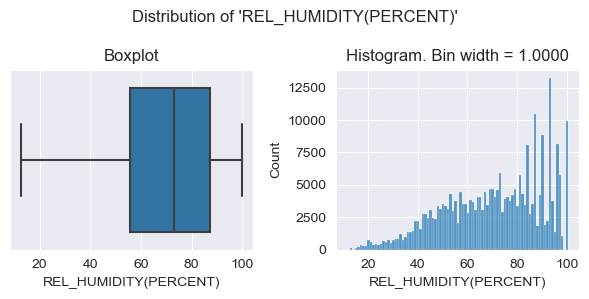

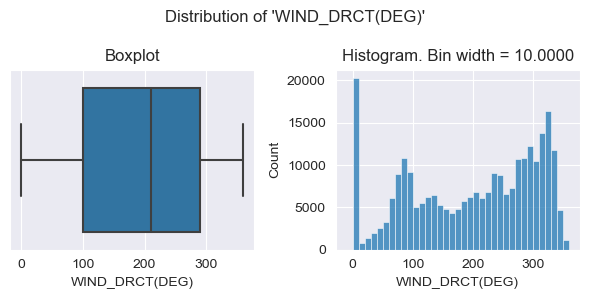

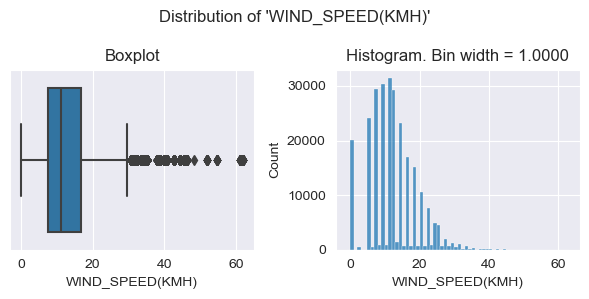

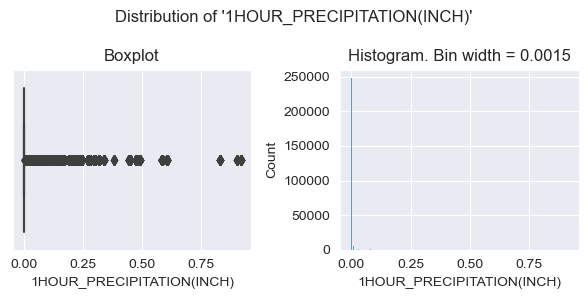

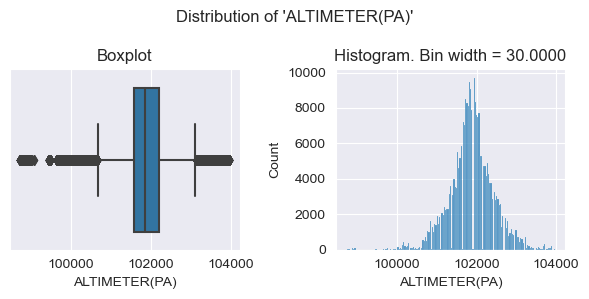

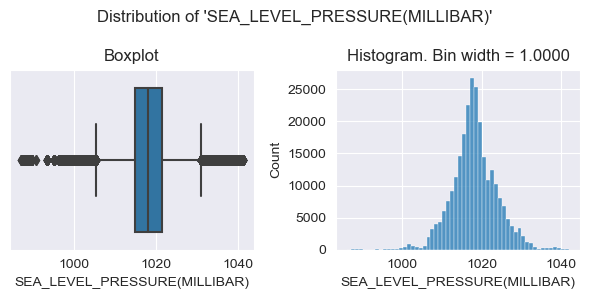

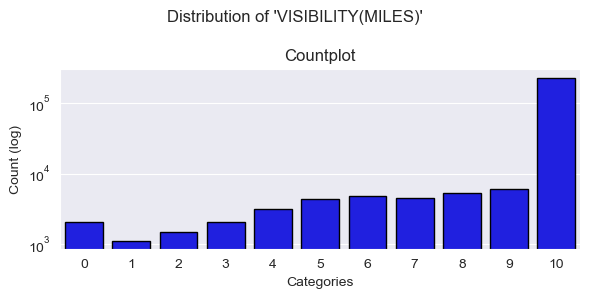

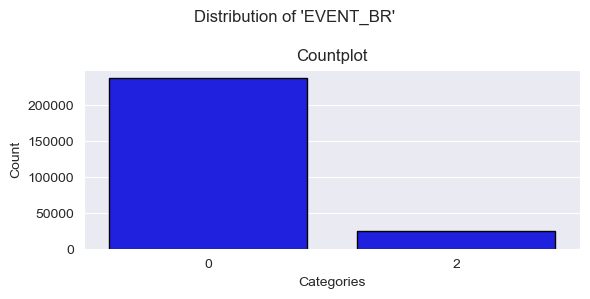

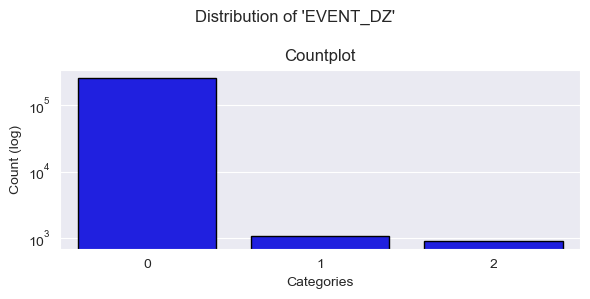

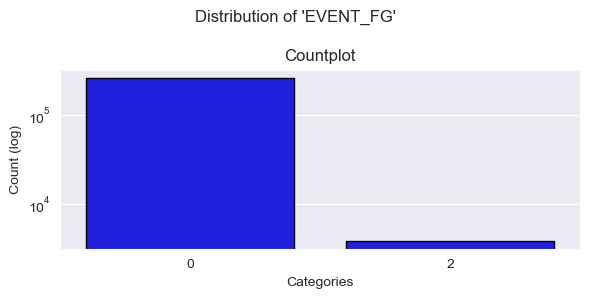

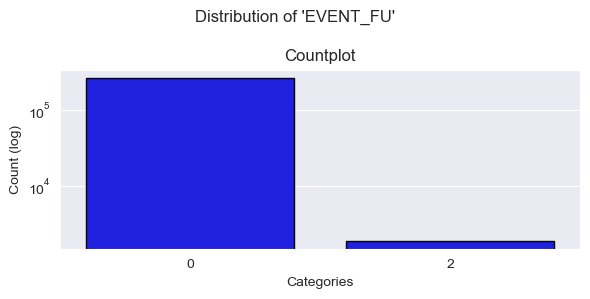

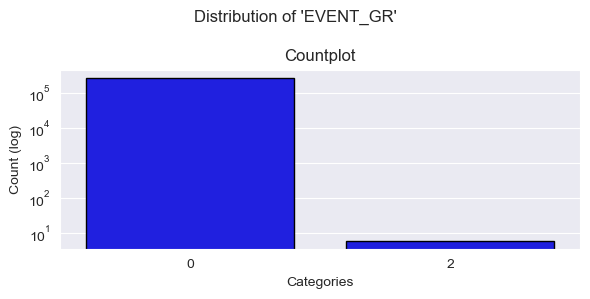

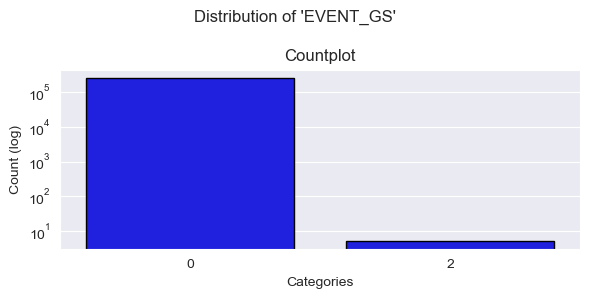

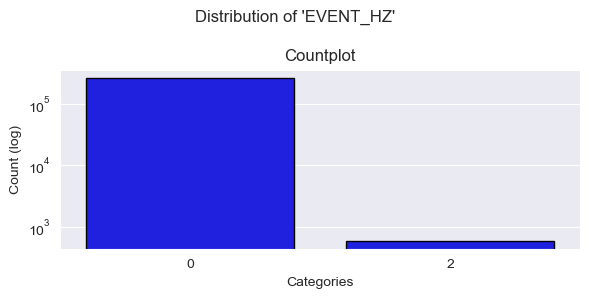

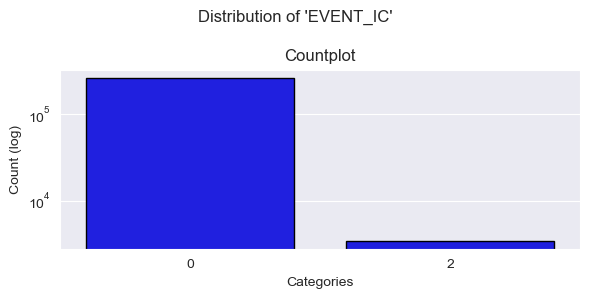

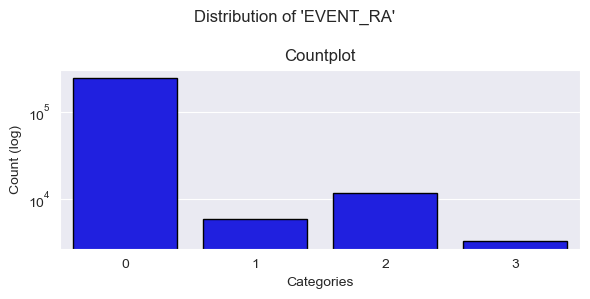

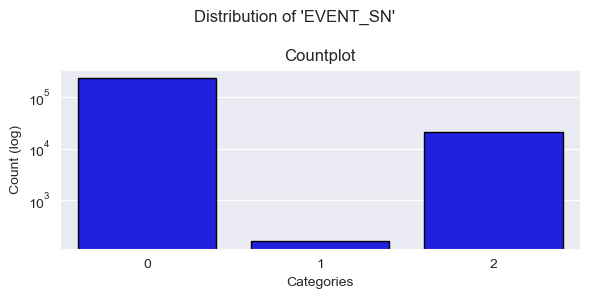

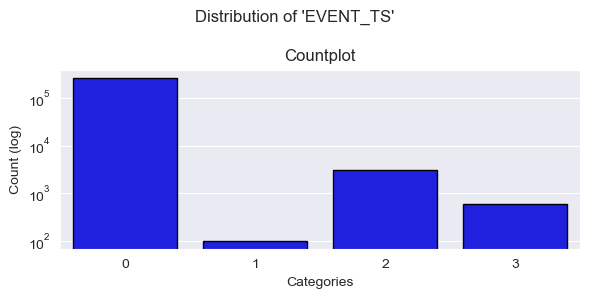

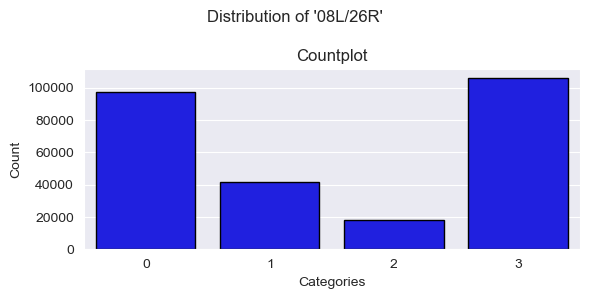

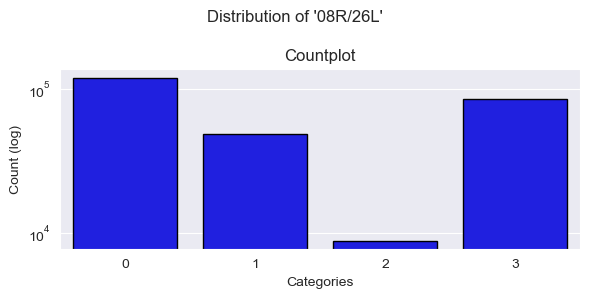

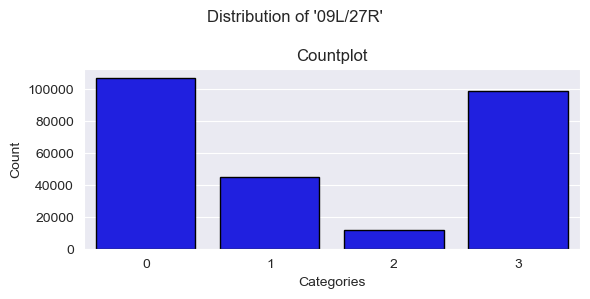

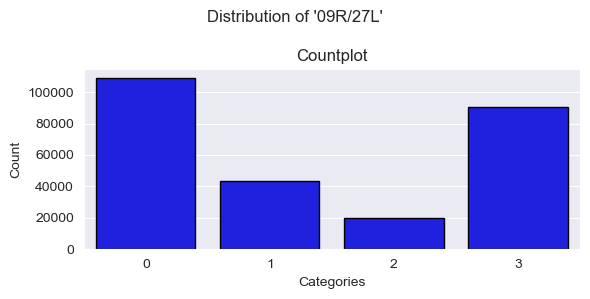

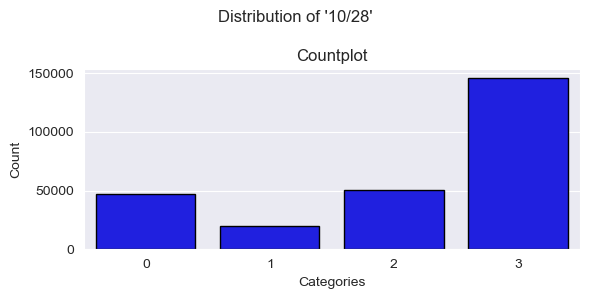

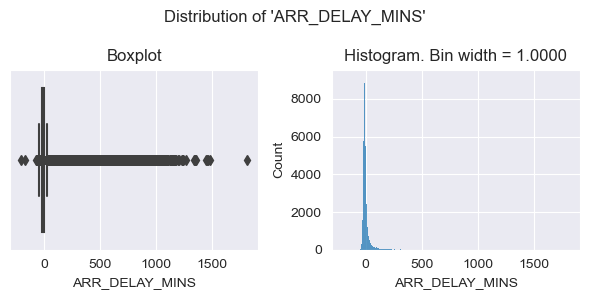

In [366]:
def is_ordinal(series: pd.Series, threshold=5e-5):
    unique_values = series.unique()
    num_unique = len(unique_values)
    
    # Check if the number of unique values is relatively small compared to the total number of values
    if num_unique / len(series) < threshold:
        # Check if the unique values represent ordered categories
        unique_sorted = sorted(unique_values)
        if all(isinstance(val, np.integer)for val in unique_sorted):
            return True
    return False

def plot_column_distribution(series: pd.Series, figsize = (6,3)):
    assert isinstance(series, pd.Series), f"Expected type pd.Series. Got {type(series)}"
    
    if is_ordinal(series):
        fig, ax = plt.subplots(1,1,figsize=figsize)
        if series.value_counts().max() / series.value_counts().min() > 10:
            sns.countplot(x=series, ax=ax, color="blue", edgecolor="black", linewidth=1, log=True)
            plt.ylabel('Count (log)')
        else:
            sns.countplot(x=series, ax=ax, color="blue", edgecolor="black", linewidth=1, log=False)
            plt.ylabel('Count')
        plt.title('Countplot')
        plt.xlabel('Categories')
        
    else:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        
        # Plot boxplot
        sns.boxplot(x=series, ax=axes[0])
        axes[0].set_title('Boxplot')
        
        # Using Scott's rule to find good bin size.
        bin_width = 3.5 * series.std() / (len(series) ** (1/3))
        
        # Plot histogram
        if 0.1 <= bin_width <= 5:
            bin_width = 1
            sns.histplot(series, ax=axes[1], kde=False, bins=np.arange(series.min()-bin_width, series.max()+bin_width,bin_width))
        elif bin_width < 0.1:
            bin_width = round(bin_width,4)
            sns.histplot(series, ax=axes[1], kde=False, bins=np.arange(series.min()-bin_width, series.max()+bin_width,bin_width))
        elif bin_width > 5:
            bin_width = round(bin_width,-1)
            sns.histplot(series, ax=axes[1], kde=False, bins=np.arange(series.min()-bin_width, series.max()+bin_width,bin_width))
        axes[1].set_title(f'Histogram. Bin width = {bin_width:.4f}')

    fig.suptitle(f"Distribution of '{series.name}'", fontsize=12)
    plt.tight_layout()
    plt.show()


for col in train.columns:
    plot_column_distribution(train[col])

In [367]:
lower_bound = -60
upper_bound = +60
print(f"Used lower bound: {lower_bound}\nUsed upper bound: {upper_bound}")
filtered = train[(train["DEP_DELAY(MINS)"] >= lower_bound) & (train["DEP_DELAY(MINS)"] <= upper_bound)].copy()
print(f"Filtered columns: {train.shape[0] - filtered.shape[0]}")
print(f"Leaving DataFrame with shape: {filtered.shape}")

Used lower bound: -60
Used upper bound: 60
Filtered columns: 12325
Leaving DataFrame with shape: (250879, 44)


## Plotting Boxplots and Countplot of Filtered Data

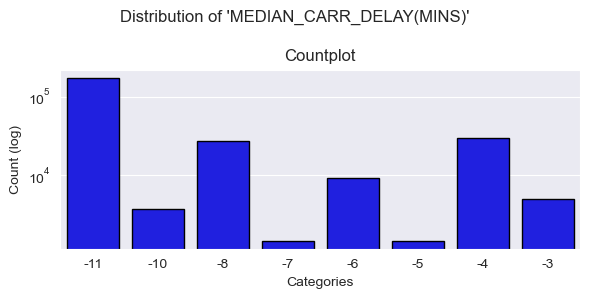

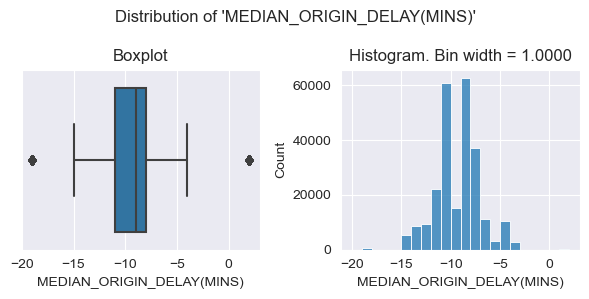

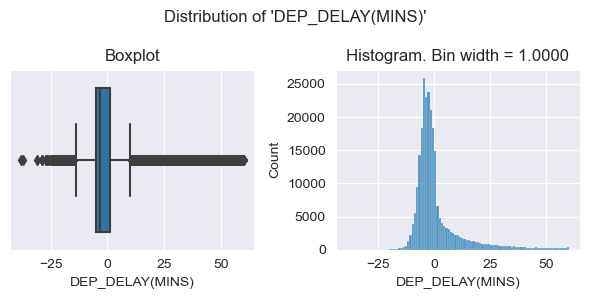

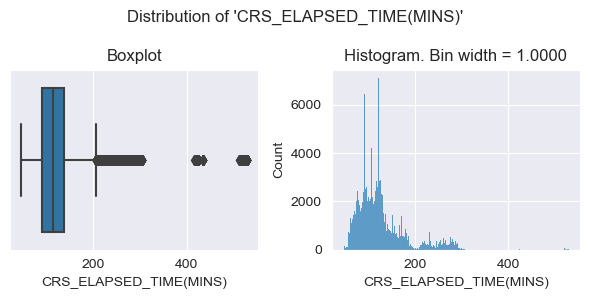

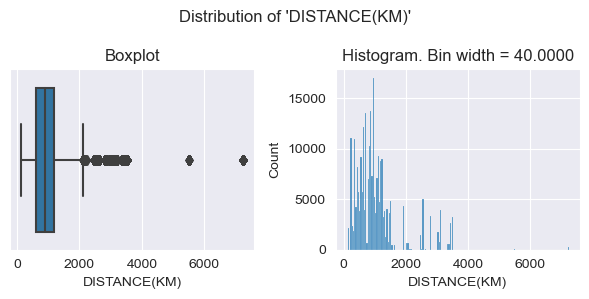

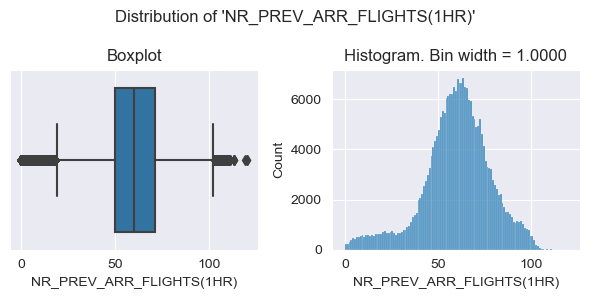

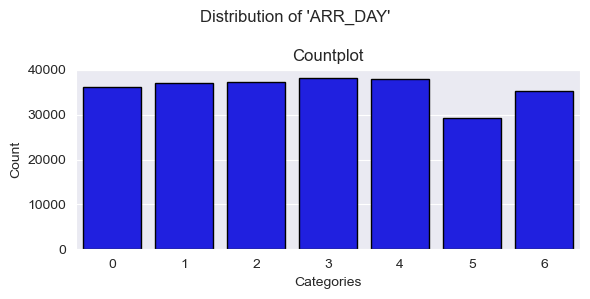

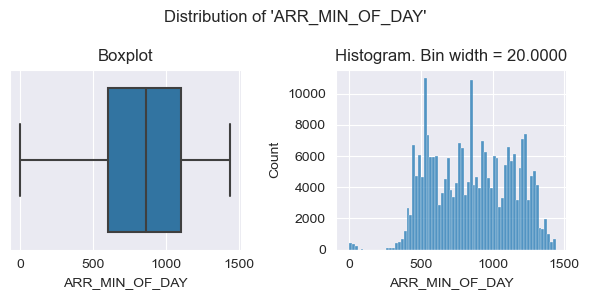

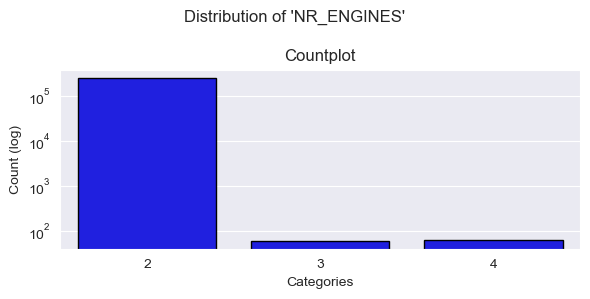

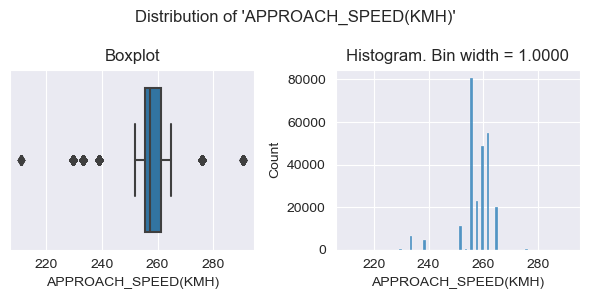

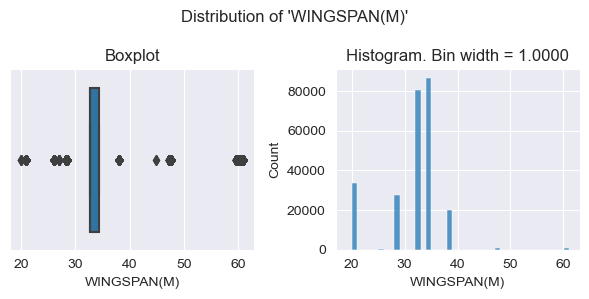

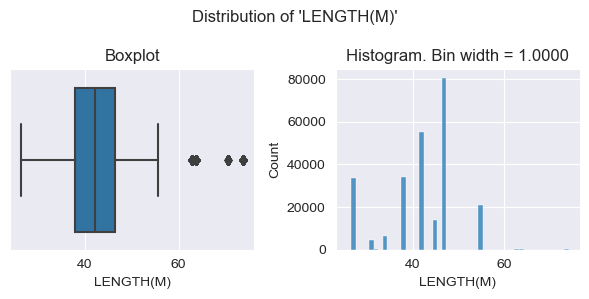

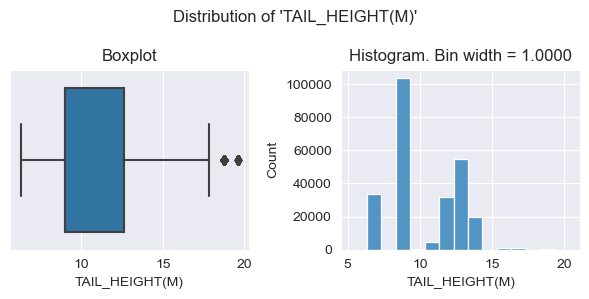

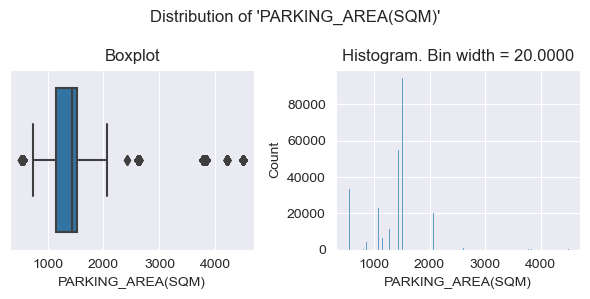

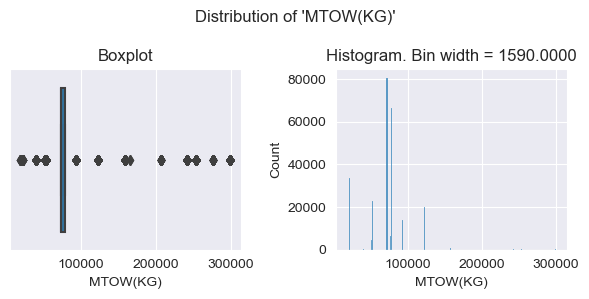

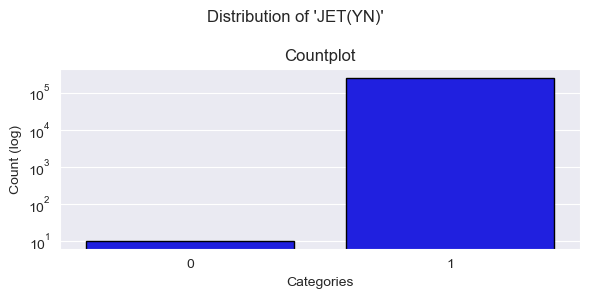

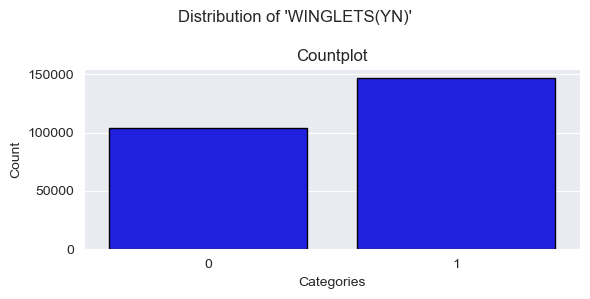

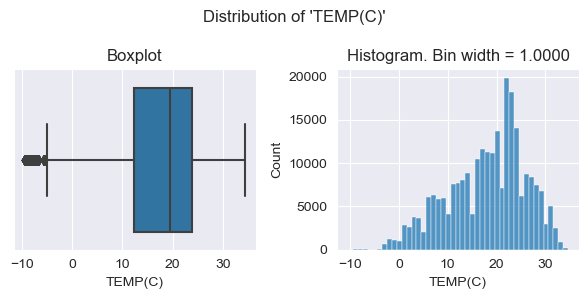

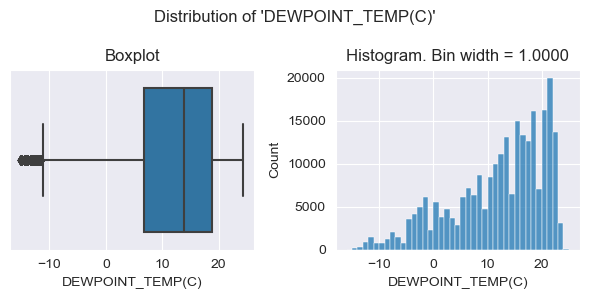

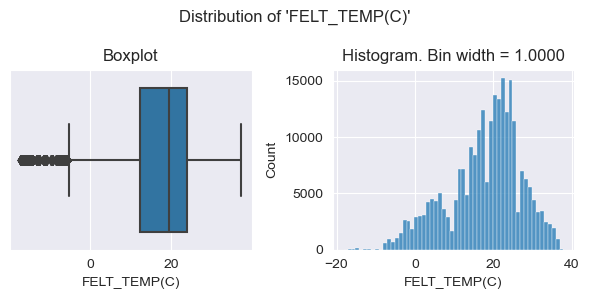

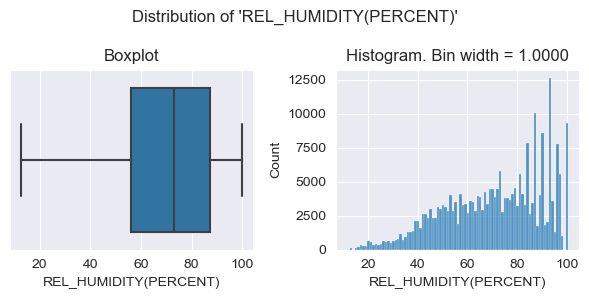

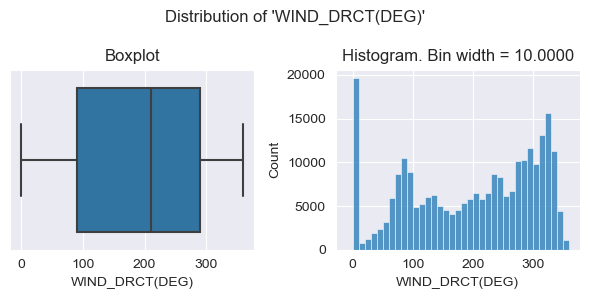

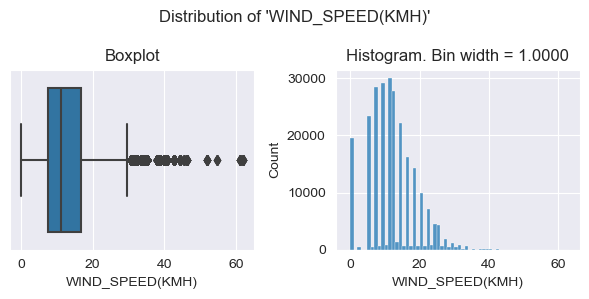

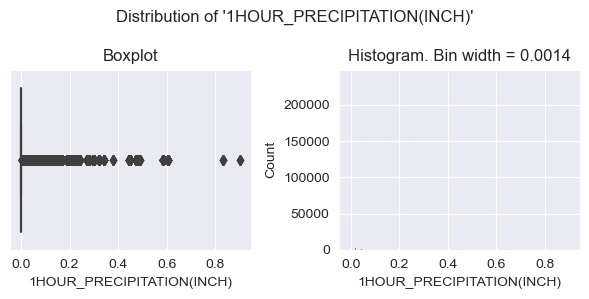

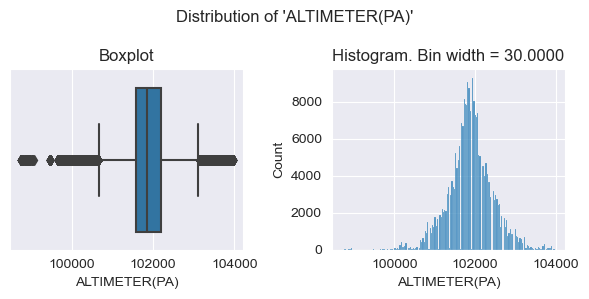

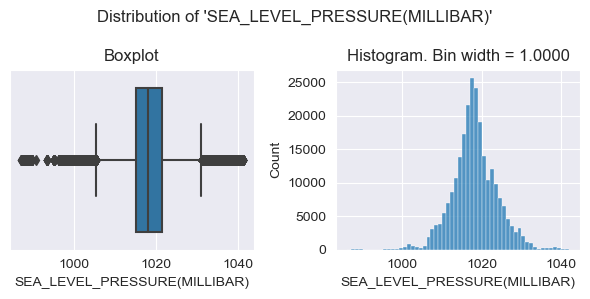

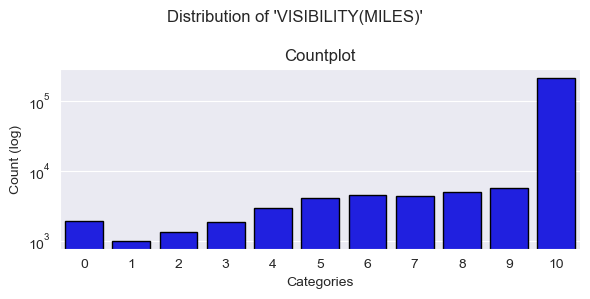

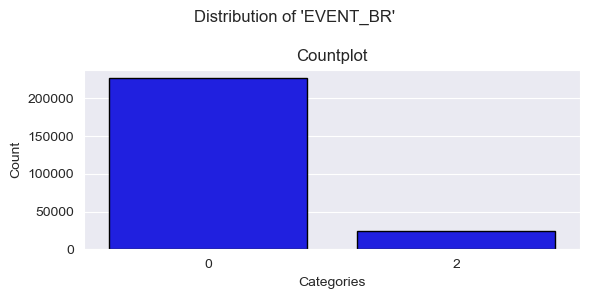

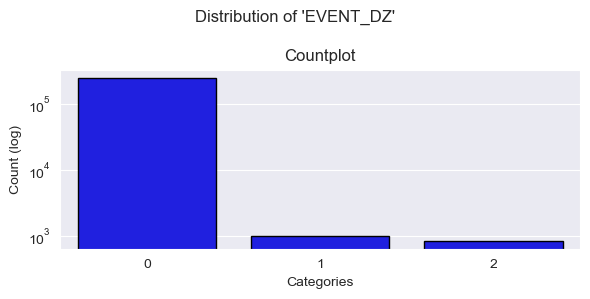

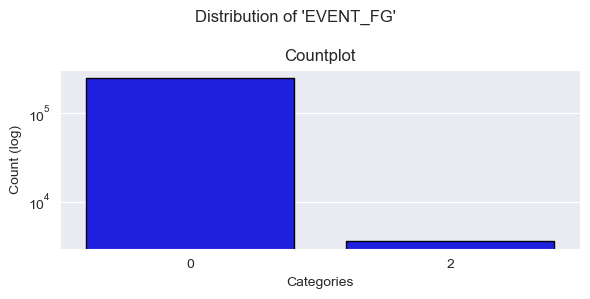

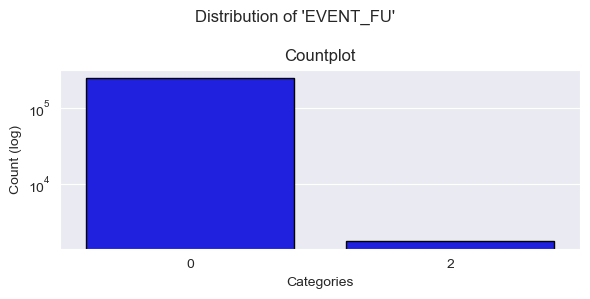

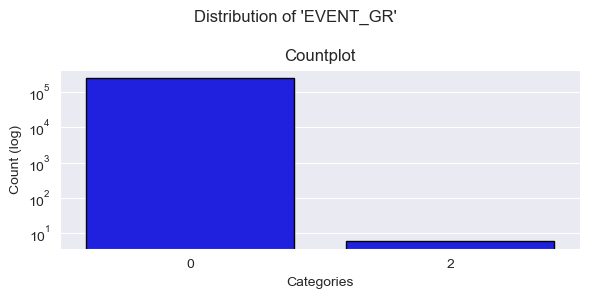

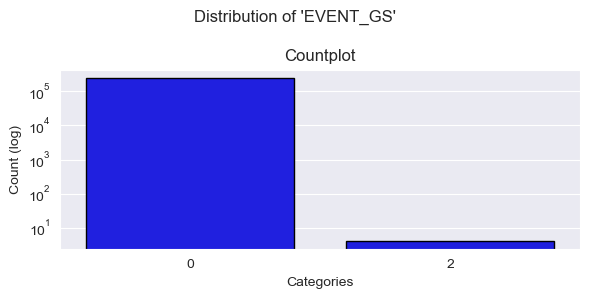

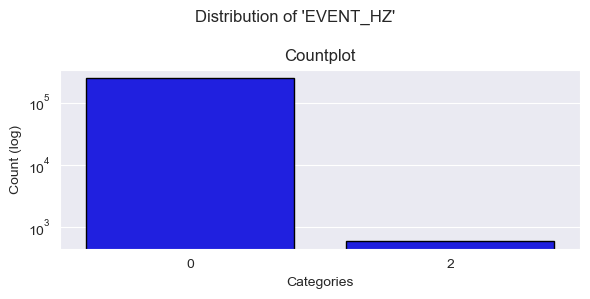

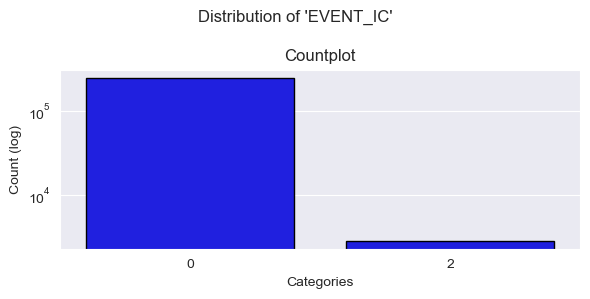

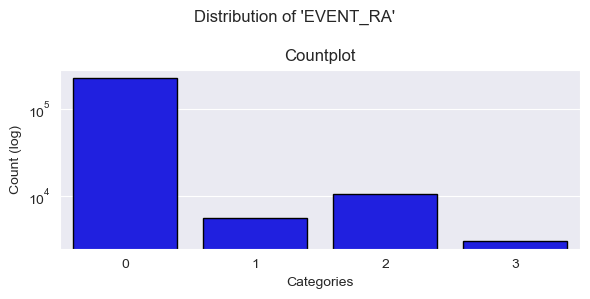

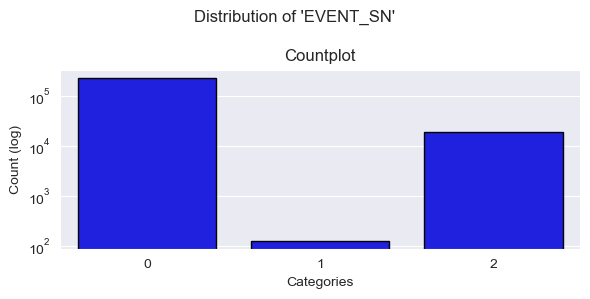

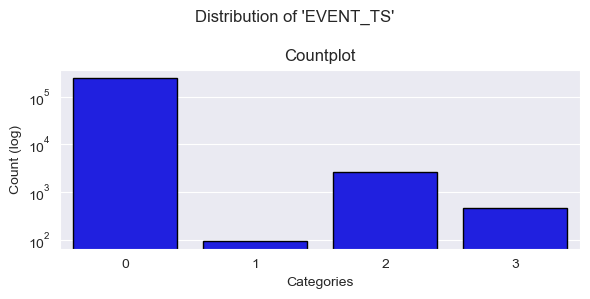

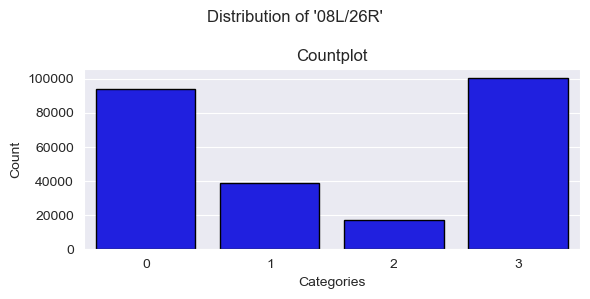

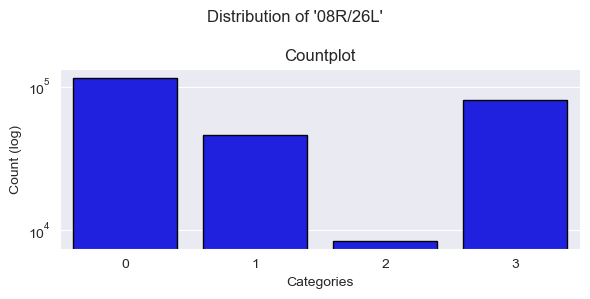

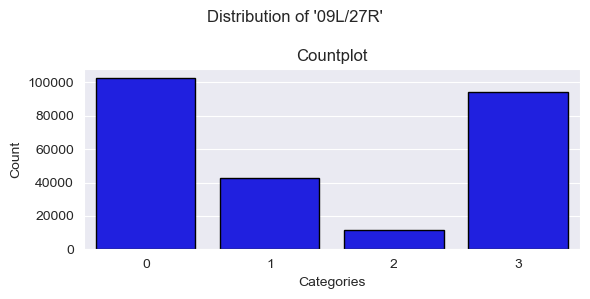

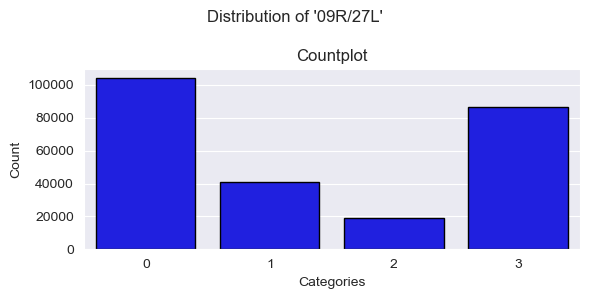

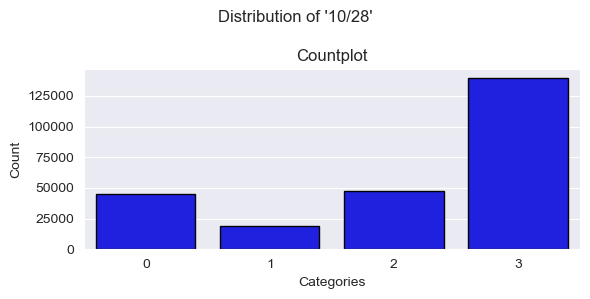

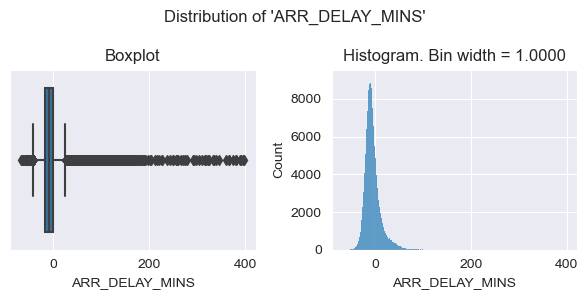

In [368]:
for col in filtered.columns:
    plot_column_distribution(filtered[col])

## Checking for "Fixable" Distance in Dep Delay

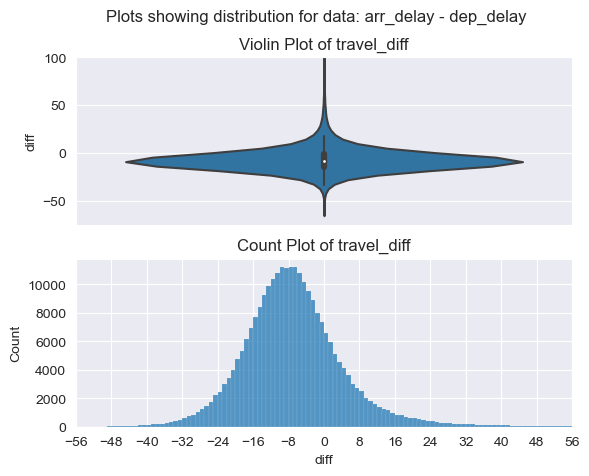

In [369]:
# Create plot frame
fig, axs = plt.subplots(2,1)
fig.suptitle("Plots showing distribution for data: arr_delay - dep_delay")

# Create data
travel_diff = train["ARR_DELAY_MINS"] - train["DEP_DELAY(MINS)"]
travel_diff_df = pd.DataFrame({"diff" : travel_diff})

# Create violin plot
min_value = -75
max_value = 100

sns.violinplot(travel_diff_df, y = "diff", ax=axs[0])
axs[0].set_title("Violin Plot of travel_diff")
axs[0].set_ylim(min_value, max_value)

# Create count plot
µ = travel_diff_df["diff"].median()
min_value = -(abs(µ) * 7)
max_value = (abs(µ) * 7)
steps = abs(µ)
left_values = np.arange(min_value,µ,steps)
right_values = np.arange(µ, max_value + 1, steps)
values = np.concatenate((left_values, right_values))

sns.histplot(travel_diff_df, x="diff", ax=axs[1], bins=np.arange(travel_diff_df["diff"].min(),travel_diff_df["diff"].max()+1,1))
axs[1].set_title('Count Plot of travel_diff')
axs[1].set_xlim(min_value, max_value)
axs[1].set_xticks(values)

plt.show()

In [370]:
travel_diff_df.sort_values(by="diff")

,diff
5678763,-63
6377024,-62
5924462,-61
6426478,-60
6396424,-58
...,...
11071114,385
11070153,391
11069813,392
11071196,396


In [371]:
all(train["CRS_ELAPSED_TIME(MINS)"] % 1 == 0)

True

In [372]:
train

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY,ARR_MIN_OF_DAY,NR_ENGINES,APPROACH_SPEED(KMH),WINGSPAN(M),LENGTH(M),TAIL_HEIGHT(M),PARKING_AREA(SQM),MTOW(KG),JET(YN),WINGLETS(YN),TEMP(C),DEWPOINT_TEMP(C),FELT_TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),1HOUR_PRECIPITATION(INCH),ALTIMETER(PA),SEA_LEVEL_PRESSURE(MILLIBAR),VISIBILITY(MILES),EVENT_BR,EVENT_DZ,EVENT_FG,EVENT_FU,EVENT_GR,EVENT_GS,EVENT_HZ,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5998106,-11,-11,107,89,548.78494,74,4,1119,2,255.576,32.799528,46.500014,9.000744,1525.176514,72574.7200,1,1,6.722222,-3.277778,2.644444,48.88,290.0,26.854,0.00,101862.579714,1018.8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,109
9744846,-11,-11,-3,106,830.41944,83,3,601,2,255.576,32.799528,46.500014,9.000744,1525.176514,72574.7200,1,1,22.222222,19.388889,22.222222,83.99,330.0,9.260,0.00,101727.124156,1016.2,10,0,0,0,2,0,0,0,0,0,0,0,3,3,0,3,3,-5
8656393,-11,-9,64,98,653.39204,53,6,853,2,255.576,32.799528,46.500014,9.000744,1525.176514,72574.7200,1,1,22.777778,21.722222,23.561111,93.77,270.0,12.964,0.06,101828.715825,1017.5,10,2,0,0,0,0,0,0,0,3,0,2,0,3,0,0,3,46
7404998,-11,-8,-2,121,935.02654,88,4,1256,2,261.132,34.314384,42.114216,12.624816,1445.094760,79015.7264,1,0,27.777778,18.277778,28.755556,56.24,180.0,18.520,0.00,101727.124156,1016.3,10,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,-19
8855927,-11,-5,15,132,1120.10064,74,3,1209,2,257.428,28.446984,37.795200,9.043416,1075.157934,53523.8560,1,0,31.722222,21.722222,35.194444,55.46,220.0,9.260,0.00,101794.851935,1016.2,10,0,0,0,0,0,0,0,0,0,2,0,3,0,3,0,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6,-9,-3,126,975.26004,95,6,549,2,229.648,26.008584,31.674816,9.854184,823.857302,40369.6880,1,1,3.888889,-5.000000,0.727778,52.30,240.0,16.668,0.00,101456.213040,1014.9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,-15
7551519,-11,-15,-8,142,1200.56764,74,0,882,2,257.428,28.446984,37.795200,9.043416,1075.157934,53523.8560,1,0,15.000000,7.222222,15.000000,59.67,310.0,9.260,0.00,101964.171383,1019.3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,-33
7375452,-11,-8,-4,122,935.02654,58,3,1077,2,264.836,38.048184,54.431184,13.639800,2071.070234,122469.8400,1,0,21.722222,19.694444,22.011111,87.51,200.0,14.816,0.00,101015.982476,1009.0,9,0,0,0,0,0,0,0,2,2,2,2,0,0,3,0,0,-1
7757994,-6,-8,180,92,584.19042,62,6,1290,2,259.280,20.930616,26.770584,6.324600,560.293571,21522.9404,1,1,28.277778,19.388889,29.694444,58.55,260.0,12.964,0.00,101828.715825,1017.2,10,0,0,0,0,0,0,0,0,0,0,0,1,3,1,3,1,158
